reference: [comparison of F-test and mutual information](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

[f-statistic in linear regression](https://youtu.be/7ArmBVF2dCs?t=1102)

if f-statistic p_values is NOT below 0.05, then it is statistically not significant. Therefore, drop that feature.

,X1,X2,X3,X4
X1,1.000000,0.028458,-0.012328,-0.064236
X2,0.028458,1.000000,0.003894,0.002019
X3,-0.012328,0.003894,1.000000,0.013099
X4,-0.064236,0.002019,0.013099,1.000000


,X1,X2,X3,X4,y
y,0.332614,-0.294783,-0.016519,-0.003415,1.000000


,X1,X2,X3,X4,y
y,0.324552,-0.294925,-0.018054,-0.003764,1.000000


,X1,X2,X3,X4,y
y,0.227988,-0.197145,-0.011832,-0.001666,1.000000


========= SelectKBest =========
f-statistic [0.24047928 0.85453782 0.         0.        ]
p_values None
coef [ 0.90318211 -0.80614205  0.05021047]
MAE 0.5881479690214271
f-statistic [1.24145394e+02 9.49764532e+01 2.72405224e-01 1.16364160e-02]
p_value < 0.05 [2.94120312e-27 1.68912511e-21 6.01838686e-01 9.14118735e-01] [ True  True False False]
f-statistic ratio [1.00000000e+00 7.65042102e-01 2.19424350e-03 9.37321606e-05]
mi [0.24047928 0.85453782 0.         0.        ]
mi ratio [0.28141443 1.         0.         0.        ]


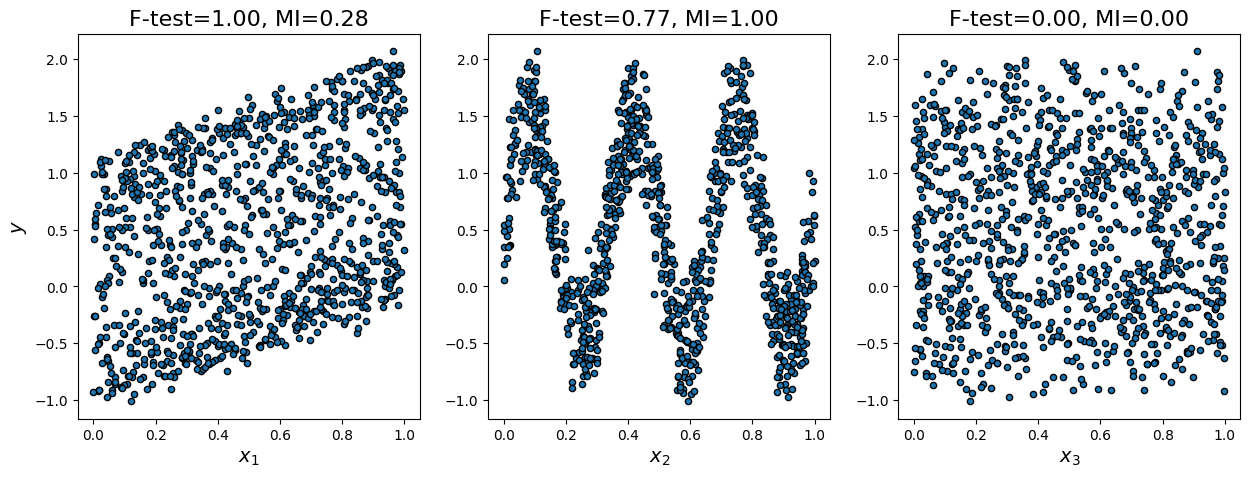

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

np.random.seed(0)
X = pd.DataFrame(data=np.random.rand(1000, 4), columns=['X1', 'X2', 'X3', 'X4']) # X1,X2,X3
y = pd.Series(
    data=X.iloc[:, 0] + np.sin(6 * np.pi * X.iloc[:, 1]) + 0.1 * np.random.randn(1000),
    name='y'
)

display(X.corr(method='pearson').style.background_gradient(cmap='coolwarm'))
Xy = pd.concat([X,y], axis=1)
display(Xy.corr(method='pearson')[['y']].T.style.background_gradient(cmap='coolwarm'))
display(Xy.corr(method='spearman')[['y']].T.style.background_gradient(cmap='coolwarm'))
display(Xy.corr(method='kendall')[['y']].T.style.background_gradient(cmap='coolwarm'))

sel = SelectKBest(score_func=f_regression, k=3).fit(X=X, y=y)
print("========= SelectKBest =========")
print("f-statistic", sel.scores_)
print("p_values", sel.pvalues_, sel.pvalues_ < 0.05)
print("===============================")
X_new = sel.transform(X=X)

reg = LinearRegression().fit(X=X_new,y=y)
y_pred = reg.predict(X=X_new)
print("coef", reg.coef_)
print("MAE", mean_absolute_error(y_true=y, y_pred=y_pred))

f_test, p_values = f_regression(X, y)
print("f-statistic", f_test)
print("p_value < 0.05", p_values, p_values < 0.05) # X1,X2 statistically significant
f_test /= np.max(f_test)
print("f-statistic ratio", f_test)

mi = mutual_info_regression(X, y)
print("mi", mi)
mi /= np.max(mi)
print("mi ratio", mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X.iloc[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()